## Exploratory Data Analysis

In [242]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 150)

import gc
import os

# matplotlib and seaborn for plotting
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size

import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import seaborn as sns
color = sns.color_palette()

root = 'C:/Data/instacart-market-basket-analysis/'

In [207]:
aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')
orders = pd.read_csv(root + 'orders.csv')
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')
products = pd.read_csv(root + 'products.csv')

Let's combine aisles, department and products files with order_products_prior and order_products_train.

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


#### Merging of Dataframes

In [208]:
order_products_prior = order_products_prior.merge(products, on ='product_id', how='left')
order_products_prior = order_products_prior.merge(aisles, on ='aisle_id', how='left')
order_products_prior = order_products_prior.merge(departments, on ='department_id', how='left')
order_products_prior = order_products_prior.merge(orders, on='order_id', how='left')

In [210]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [213]:
order_products_prior.eval_set.value_counts()

prior    32434489
Name: eval_set, dtype: int64

In [209]:
order_products_train = order_products_train.merge(products, on ='product_id', how='left')
order_products_train = order_products_train.merge(aisles, on ='aisle_id', how='left')
order_products_train = order_products_train.merge(departments, on ='department_id', how='left')
order_products_train = order_products_train.merge(orders, on='order_id', how='left')

In [211]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0


In [214]:
order_products_train.eval_set.value_counts()

train    1384617
Name: eval_set, dtype: int64

Since evaluation set is train only, we can say that the merge is correct.

### order_products_prior

In [212]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


#### Products

In [245]:
temp_df = order_products_prior.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

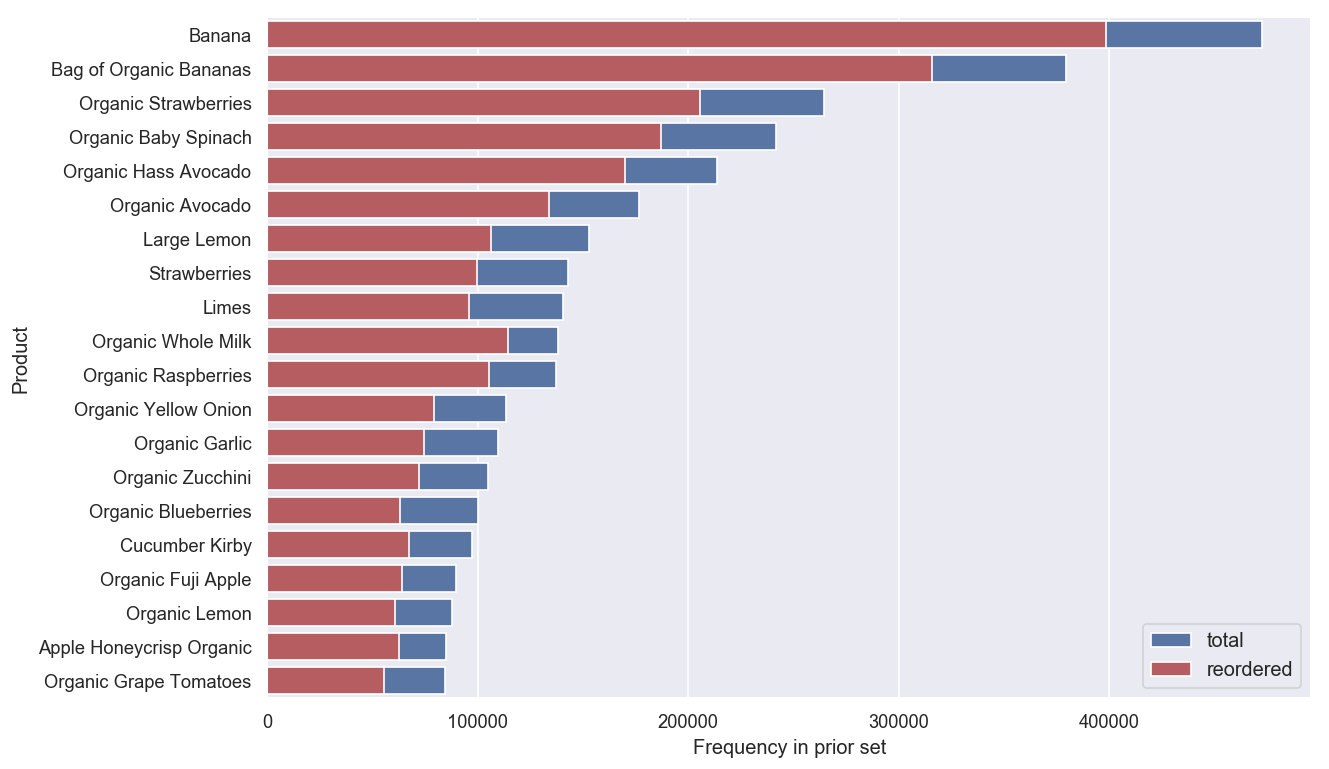

In [248]:
ax, fig = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.reorders[0:20], color=color[3], label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Frequency in prior set")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [249]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df.sort_values("reorder_ratio", ascending=False).head(10)

,product_name,total,reorders,reorder_ratio
23522,Raw Veggie Wrappers,68,64,0.941176
21266,Serenity Ultimate Extrema Overnight Pads,87,81,0.931034
39641,Orange Energy Shots,13,12,0.923077
19939,Chocolate Love Bar,101,93,0.920792
30222,Soy Powder Infant Formula,35,32,0.914286
27687,Simply Sleep Nighttime Sleep Aid,45,41,0.911111
34768,"Energy Shot, Grape Flavor",22,20,0.909091
24772,Sparking Water,60,54,0.900000
19996,Maca Buttercups,100,90,0.900000
31726,Russian River Valley Reserve Pinot Noir,30,27,0.900000


In [219]:
product_unique_users = order_products_prior.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
product_unique_users.sort_values('total_users', ascending = False).head(10)

,product_name,total_users
3676,Banana,73956
3471,Bag of Organic Bananas,63537
31920,Organic Strawberries,58838
28840,Organic Baby Spinach,55037
22413,Large Lemon,46402
23420,Limes,44859
30297,Organic Hass Avocado,43453
42904,Strawberries,43149
28804,Organic Avocado,42771
29008,Organic Blueberries,37138


In [220]:
product_unique_users = product_unique_users.merge(temp_df, on='product_name', how='left')
product_unique_users.sort_values("reorder_ratio", ascending=False).head(10)

,product_name,total_users,total,reorders,reorder_ratio
37375,Raw Veggie Wrappers,4,68,64,0.941176
39866,Serenity Ultimate Extrema Overnight Pads,6,87,81,0.931034
28412,Orange Energy Shots,1,13,12,0.923077
8535,Chocolate Love Bar,8,101,93,0.920792
41719,Soy Powder Infant Formula,3,35,32,0.914286
40454,Simply Sleep Nighttime Sleep Aid,4,45,41,0.911111
13842,"Energy Shot, Grape Flavor",2,22,20,0.909091
38789,Russian River Valley Reserve Pinot Noir,3,30,27,0.900000
24024,Maca Buttercups,10,100,90,0.900000
41798,Sparking Water,6,60,54,0.900000


### Organic Vs Inorganic

In [255]:
temp_df['Organic'] = temp_df.product_name.str.contains("Organic")
temp_df.head()

,product_name,total,reorders,reorder_ratio,Organic
0,Banana,472565,398609,0.843501,False
1,Bag of Organic Bananas,379450,315913,0.832555,True
2,Organic Strawberries,264683,205845,0.777704,True
3,Organic Baby Spinach,241921,186884,0.772500,True
4,Organic Hass Avocado,213584,170131,0.796553,True


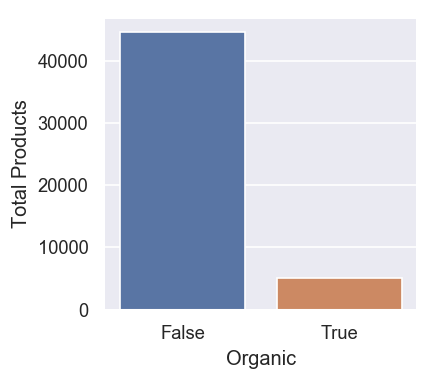

In [264]:
ax, fig = plt.subplots(figsize = (3,3))
ax = sns.barplot(x = temp_df.groupby('Organic').size().index, y = temp_df.groupby('Organic').size().values)
ax.set_xlabel("Organic")
ax.set_ylabel("Total Products")
plt.show()

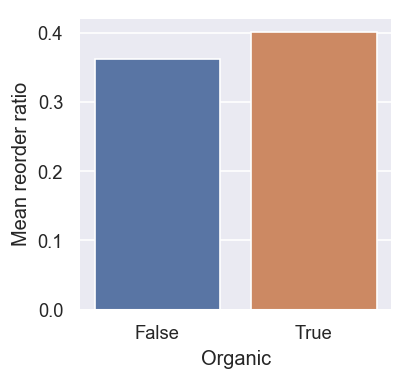

In [265]:
ax, fig = plt.subplots(figsize = (3,3))
ax = sns.barplot(x = temp_df.groupby('Organic')['reorder_ratio'].mean().index, y = temp_df.groupby('Organic')['reorder_ratio'].mean().values)
ax.set_xlabel("Organic")
ax.set_ylabel("Mean reorder ratio")
plt.show()

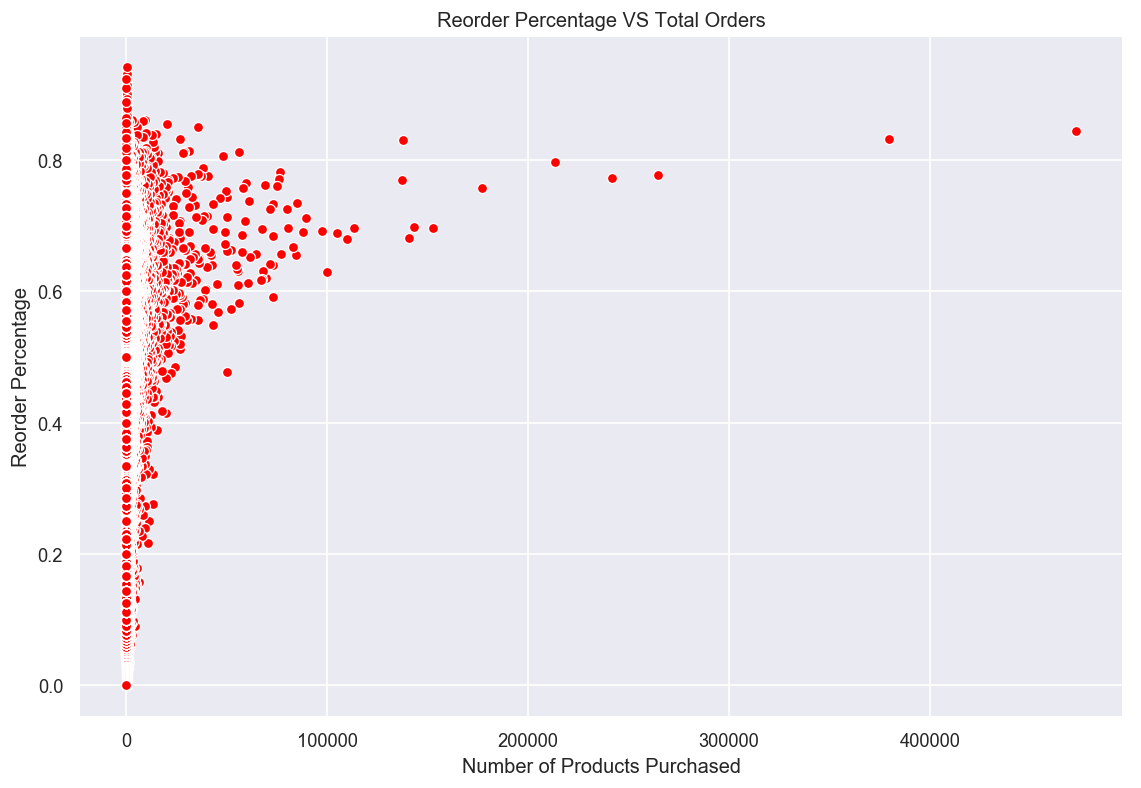

In [267]:
ax, fig = plt.subplots(figsize=(10,7))
ax = sns.scatterplot(x = temp_df.total, y = temp_df.reorder_ratio, color = "red")
ax.set_xlabel("Number of Products Purchased")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Orders")
plt.show()

In [221]:
temp_df = order_products_prior.groupby('add_to_cart_order')['reordered'].mean().reset_index()
temp_df.head()

,add_to_cart_order,reordered
0,1,0.677533
1,2,0.676251
2,3,0.658037
3,4,0.636958
4,5,0.617383


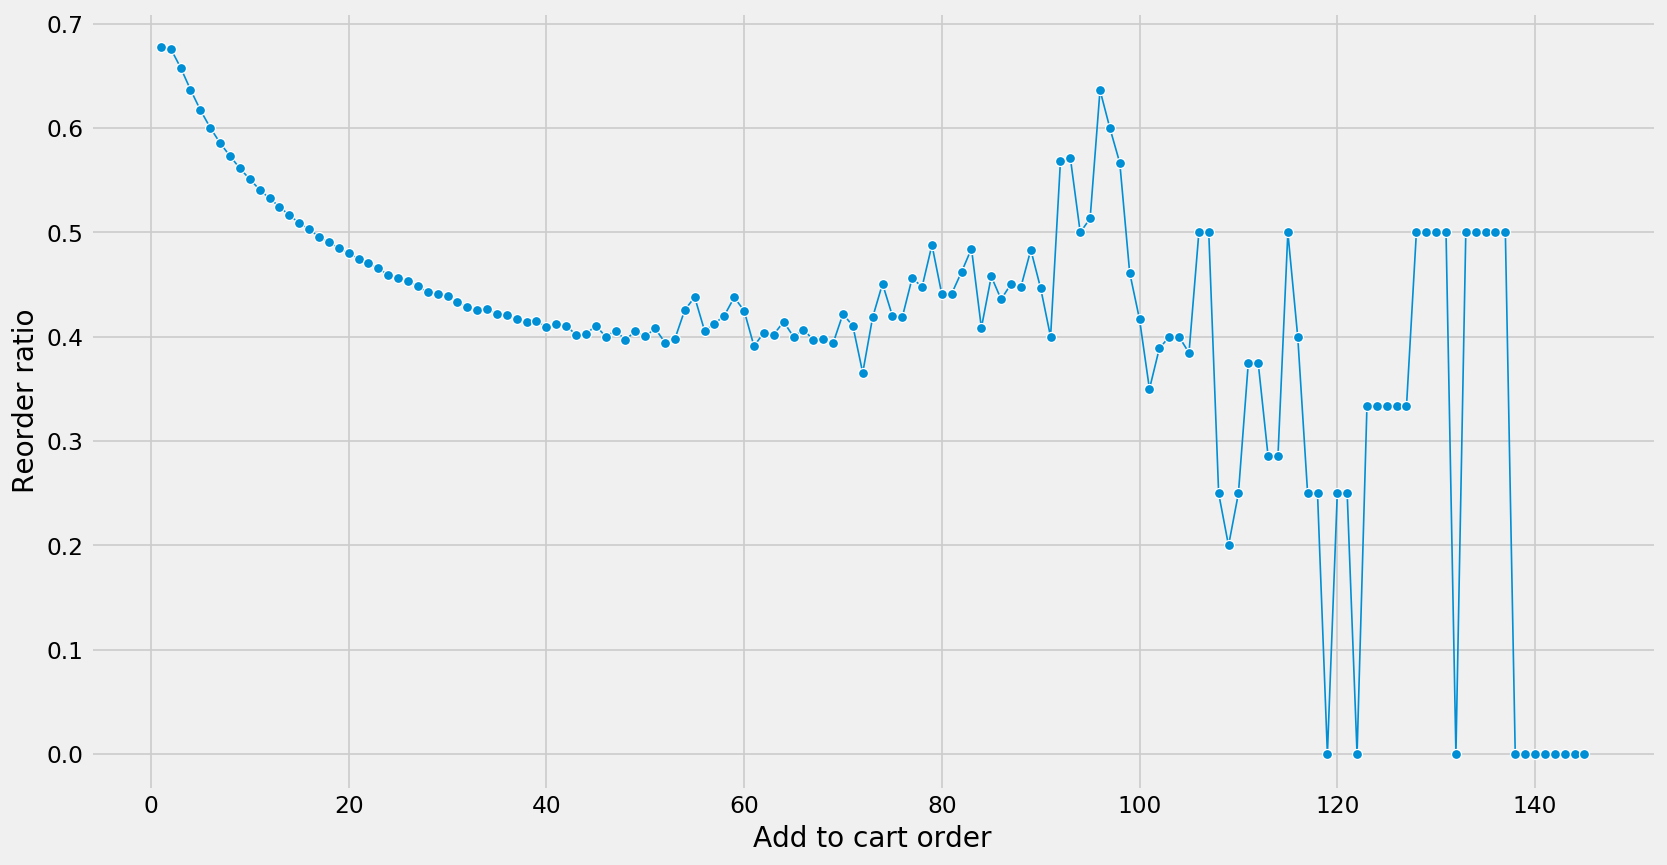

In [225]:
ax, fig = plt.subplots(figsize=(10,7))
ax = sns.lineplot(x=temp_df.add_to_cart_order, y=temp_df.reordered, lw = 1, marker='o')
ax.set_xlabel("Add to cart order")
ax.set_ylabel("Reorder ratio")
plt.show()

In [233]:
temp_df = order_products_prior.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
temp_df = temp_df.sort_values(['order_dow', 'counts'], ascending=[True, False])
temp_df = temp_df.groupby('order_dow').head(5).reset_index(drop = True)

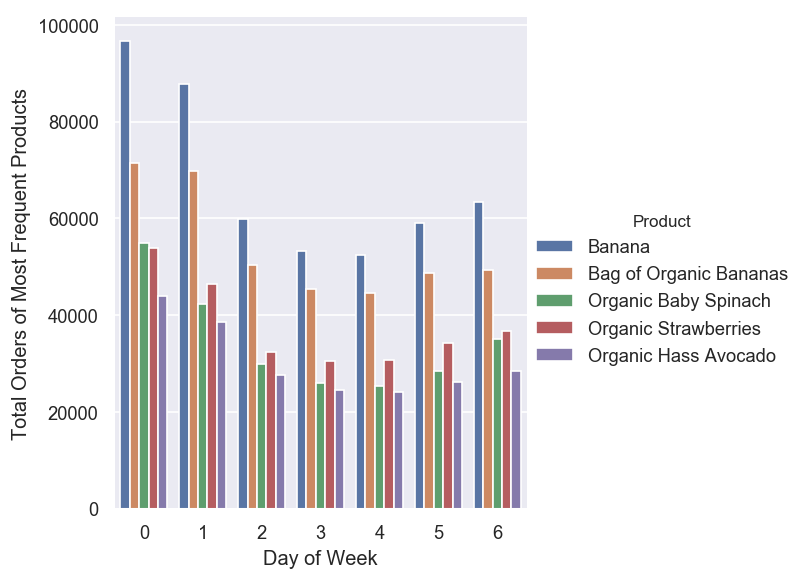

In [243]:
ax = sns.catplot(x="order_dow", y="counts", hue="product_name", data=temp_df, kind="bar", legend=False)
ax.add_legend(title="Product")
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")

#### Aisle

In [168]:
temp_df = order_products_prior.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

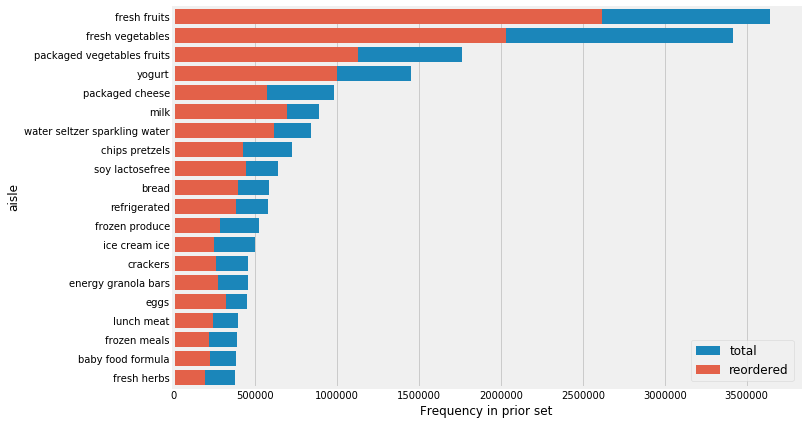

In [169]:
ax, fig = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorders[0:20], color=color[1], label = "reordered")
ax.set_ylabel("aisle")
ax.set_xlabel("Frequency in prior set")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [170]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

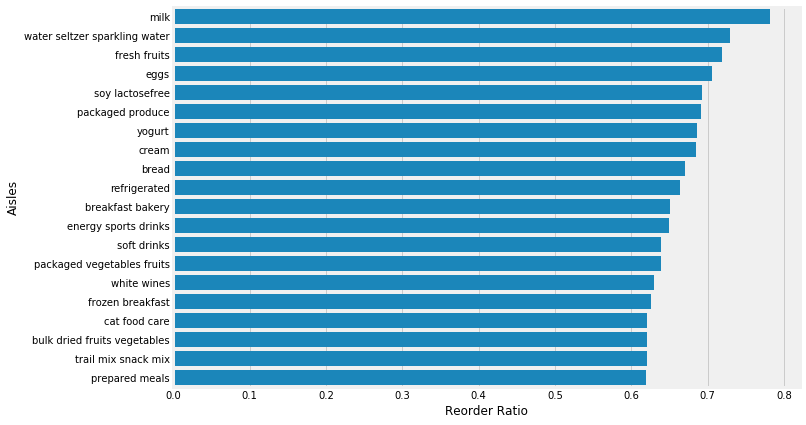

In [172]:
ax, fig = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorder_ratio[0:20], color=color[0])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
plt.show()

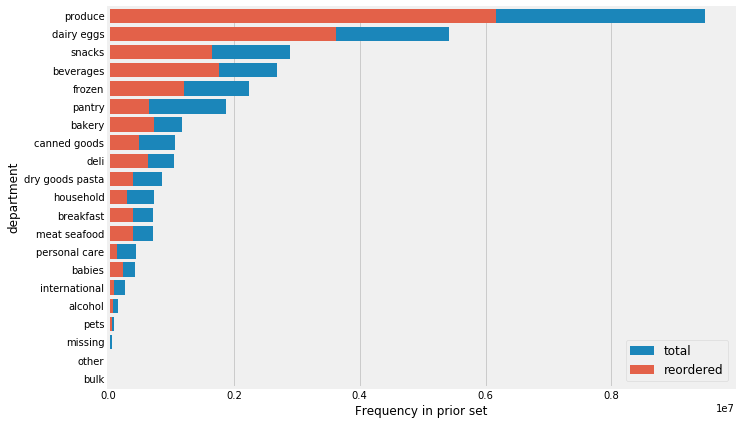

In [120]:
temp_df = order_products_prior.groupby("department")["reordered"].agg(['count', 'sum'])
temp_df = temp_df.sort_values('count', ascending=False).reset_index()

ax, fig = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.department, x = temp_df["count"], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.department, x = temp_df["sum"], color=color[1], label = "reordered")
ax.set_ylabel("department")
ax.set_xlabel("Frequency in prior set")
ax.legend(loc = 4, prop={'size': 12})
plt.show()